In [21]:
import pandas as pd
import numpy as np
import torch
import sys

sys.path.insert(0, '../../../src/')
from utils.script_utils import create_parser, create_data_
sys.path.insert(0, '../../../scripts/')
from softmargin_run_new import add_arg_parser

In [79]:
seeds = np.arange(1,21).tolist()
num_conf = 1

parser = create_parser()
add_arg_parser(parser)
args = parser.parse_args("")
args.type_graph="TREE"

args.N = 85
args.d=5
args.h = 3
args.t_limit = 15 # Numbers of epoch of our epidemics spreading [0,1,...,T_limit-1]
args.lambda_ = 0.35 # probability of infection
args.mu = 0 # probability of recovery
args.p_edge = 1
args.scale=2
args.ninf_min=5
path_dir = "./data"
if path_dir == "not_setted":
    path_dir = type_graph

In [80]:
from epigen import epidemy_gen_new

list_contacts = {}
data_={}
INSTANCES = []
for i_seed, seed in enumerate(seeds):
    print(f"\nSEED: {seed}")

    args.seed=seed
    args.num_conf=num_conf
    #print(args)
    temp, name_file, INSTANCE = create_data_(args, give_instance=True)
    print(str(INSTANCE))
    INSTANCES.append(INSTANCE)
    #Ns[cl] = int(max(temp["contacts"][:, 1]) + 1)
    list_contacts[seed] = temp["contacts"]
    data_[seed] = temp

data_.keys()


SEED: 1
nodes:85, edges:84
number of contacts: 2520
Lim infected: 5, Lim max infected: 86
Num sources:  1
 # conf 1,mean infected: 79.0, mean recover: 0.0, max num infected: 79
0 (0.00%) epidemies refused

S:6, I:79, R:0
TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_1_pe_1

SEED: 2
nodes:85, edges:84
number of contacts: 2520
Lim infected: 5, Lim max infected: 86
Num sources:  1
 # conf 1,mean infected: 74.0, mean recover: 0.0, max num infected: 74
0 (0.00%) epidemies refused

S:11, I:74, R:0
TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_2_pe_1

SEED: 3
nodes:85, edges:84
number of contacts: 2520
Lim infected: 5, Lim max infected: 86
Num sources:  1
 # conf 1,mean infected: 73.0, mean recover: 0.0, max num infected: 73
0 (0.00%) epidemies refused

S:12, I:73, R:0
TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_3_pe_1

SEED: 4
nodes:85, edges:84
number of contacts: 2520
Lim infected: 5, Lim max infected: 86
Num sources:  1
 # conf 1,mean infected: 13.0, mean recover: 0.0, max num infected: 13
0 (0.00%) epidemies

../../../src/utils/script_utils.py:145: UserWarning: SAVING FOLDER DOES NOT EXIST
  warnings.warn("SAVING FOLDER DOES NOT EXIST")


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

# READ DATA

create name_files

In [81]:
name_files_nn = {}
Ns = [args.N]
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_nn[seed] = {}
    for cl in range(len(Ns)):
        name_files_nn[seed][Ns[cl]] = {}
        name_file_init = path_dir + "/"
        #print(step, name_file_init)
        name_file_temp = name_file_init + f"lay_deep_eq_TREE_n_{Ns[cl]}_d_{args.d}_tlim_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_s_{seed}_pe_{args.p_edge}"
        #name_file_temp += f"_{seed}"
        name_files_nn[seed][Ns[cl]] = name_file_temp

name_files_sib = {}
for i_seed, seed in enumerate(seeds):
    #print(f"\nSEED: {seed}")
    name_files_sib[seed] = {}
    for cl in range(len(Ns)):
        name_files_sib[seed][Ns[cl]] = {}
        name_file_init = path_dir + "/"
        #print(step, name_file_init)
        name_file_temp = name_file_init + f"N_{Ns[cl]}_d_{args.d}_h_{args.h}_T_{args.t_limit}_lam_{args.lambda_}_mu_{args.mu}_p_edge_{args.p_edge}"
        name_file_temp += f"_s_{seed}"
        name_files_sib[seed][Ns[cl]] = name_file_temp
            #print(name_file_temp)

In [82]:
name_files_nn

{1: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_1_pe_1'},
 2: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_2_pe_1'},
 3: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_3_pe_1'},
 4: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_4_pe_1'},
 5: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_5_pe_1'},
 6: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_6_pe_1'},
 7: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_7_pe_1'},
 8: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_8_pe_1'},
 9: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_9_pe_1'},
 10: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_10_pe_1'},
 11: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_11_pe_1'},
 12: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_12_pe_1'},
 13: {85: './data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_13

### READ FILES

In [83]:
#create dictorary containing data
ress = {}
for i_seed, seed in enumerate(seeds):
    print(f"SEED: {seed}")
    ress[seed] = {}
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        ress[seed][Ns[cl]] = []
        for instance_num in range(num_conf):
            #print(f" N: {N_cl} instance {instance_num}")
            ress[seed][Ns[cl]].append({})


SEED: 1
SEED: 2
SEED: 3
SEED: 4
SEED: 5
SEED: 6
SEED: 7
SEED: 8
SEED: 9
SEED: 10
SEED: 11
SEED: 12
SEED: 13
SEED: 14
SEED: 15
SEED: 16
SEED: 17
SEED: 18
SEED: 19
SEED: 20


In [84]:
for i_seed, seed in enumerate(seeds):
    print(f"SEED: {seed}")
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        for instance_num in range(num_conf):
            ress[seed][N_cl][instance_num]["regressive"] = {}
            name_temp = name_files_nn[seed][N_cl] +"_" + str(instance_num)
            print(f"Read N: {N_cl} instance {instance_num} - {name_temp}")
            try:
                ress[seed][N_cl][instance_num]["regressive"] = {}
                ress[seed][N_cl][instance_num]["regressive"]["marginals"] = np.load(name_temp + "_margs.npz",
                                                                        "r+",
                                                                       allow_pickle=True,
                                                                       fix_imports=True)["marginals"]
            except:
                print(f"  instance_num: {instance_num} NOT FOUND")
            try:
                ress[seed][N_cl][instance_num]["regressive"]["run"] = pd.read_csv(name_temp + "_trace.gz")
                #print(f"  instance_num: {instance_num}")
            except:
                print(f"gz no found {name_temp + '.gz'}")
                pass
            try:
                '''ress[seed][N_cl][instance_num]["regressive"]["net"] = torch.load(name_temp + ".pt",
                                                                      map_location=device)
                #ress[N_cl][instance_num]["regressive"]["net"].to(device)
                ress[seed][N_cl][instance_num]["regressive"]["net"].device = device
                for ll in ress[seed][N_cl][instance_num]["regressive"]["net"].sublayers:
                    for l in ll:
                        l.device=device
                print(f"  NN net: {instance_num}")'''
                pass
            except:
                print(f"  NN net: {instance_num} NON FOUND")

SEED: 1
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_1_pe_1_0
SEED: 2
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_2_pe_1_0
SEED: 3
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_3_pe_1_0
SEED: 4
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_4_pe_1_0
SEED: 5
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_5_pe_1_0
SEED: 6
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_6_pe_1_0
SEED: 7
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_7_pe_1_0
SEED: 8
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_8_pe_1_0
SEED: 9
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_9_pe_1_0
SEED: 10
Read N: 85 instance 0 - ./data/lay_deep_eq_TREE_n_85_d_5_tlim_15_lam_0.35_mu_0_s_10_pe_1_0
SEED: 11
Read N: 8

In [85]:
for i_seed, seed in enumerate(seeds):
    print(f"SEED: {seed}")
    for cl in range(len(Ns)):
        N_cl = Ns[cl]
        for instance_num in range(num_conf):
            print(f"Read N: {N_cl} instance {instance_num}")
            name_temp = name_files_sib[seed][N_cl] +"_" + str(instance_num)
            name_temp = name_temp.replace("mu_0", "mu_0.0")
            ress[seed][N_cl][instance_num]["sib"] = {}
            try:
                ress[seed][N_cl][instance_num]["sib"]["marginals"] = np.load(name_temp + "_sib_margs.npz",
                                                                        "r+",
                                                                       allow_pickle=True,
                                                                       fix_imports=True)["marginals"]
                ress[seed][N_cl][instance_num]["sib"]["params"] = pd.read_csv(name_temp + "_params.gz")
                #print("load SIB")
            except:
                print(f"SIB not found {name_temp}")


SEED: 1
Read N: 85 instance 0
SEED: 2
Read N: 85 instance 0
SEED: 3
Read N: 85 instance 0
SEED: 4
Read N: 85 instance 0
SEED: 5
Read N: 85 instance 0
SEED: 6
Read N: 85 instance 0
SEED: 7
Read N: 85 instance 0
SEED: 8
Read N: 85 instance 0
SEED: 9
Read N: 85 instance 0
SEED: 10
Read N: 85 instance 0
SEED: 11
Read N: 85 instance 0
SEED: 12
Read N: 85 instance 0
SEED: 13
Read N: 85 instance 0
SEED: 14
Read N: 85 instance 0
SEED: 15
Read N: 85 instance 0
SEED: 16
Read N: 85 instance 0
SEED: 17
Read N: 85 instance 0
SEED: 18
Read N: 85 instance 0
SEED: 19
Read N: 85 instance 0
SEED: 20
Read N: 85 instance 0


In [86]:
ress[1][85][0]["regressive"]["run"]

,Unnamed: 0,step,beta,energy,std_energy,loss,loss_std,S,I,R,...,num_zero_pw,N,T,p_source,p_sus,p_obs,p_w,mu,lamb,max_Z
0,0,0.0,0.0000,4913.496094,398.868408,4701.431641,398.916870,80.154198,4.845800,0.0,...,306166.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.500000,-100000000.0
1,1,1.0,0.0001,1212.326050,118.179535,999.733704,118.220573,80.161797,4.838200,0.0,...,305811.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.500000,-100000000.0
2,2,2.0,0.0002,1213.290405,117.374290,1000.208374,117.448082,80.201797,4.798200,0.0,...,306640.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.500000,-100000000.0
3,3,3.0,0.0003,1214.097046,115.880989,1000.510376,115.956238,80.202194,4.797800,0.0,...,306924.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.500000,-100000000.0
4,4,4.0,0.0004,1213.077637,116.150940,999.153748,116.210716,80.137497,4.862500,0.0,...,306338.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.500000,-100000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10194,10194,10194.0,1.0000,282.725861,7.577148,169.236740,0.141622,83.996468,1.003536,0.0,...,1.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.445614,-100000000.0
10195,10195,10195.0,1.0000,282.641388,7.314546,169.235428,0.097686,83.996475,1.003525,0.0,...,0.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.445614,-100000000.0
10196,10196,10196.0,1.0000,282.586456,7.565063,169.237076,0.134470,83.996475,1.003522,0.0,...,1.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.445614,-100000000.0
10197,10197,10197.0,1.0000,282.625031,7.548411,169.235199,0.096099,83.996490,1.003511,0.0,...,0.0,85.0,16.0,0.0001,-1.0,3.059023e-11,3.059023e-11,1.000000e-06,0.445614,-100000000.0


(9300.0, 9400.0)

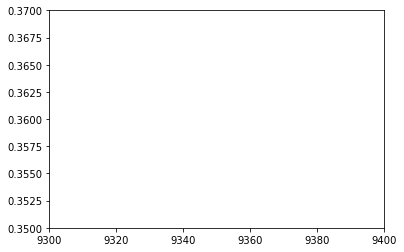

In [87]:
ax = ress[1][85][0]["regressive"]["run"]["lamb"].plot()
ax.set_ylim(0.35, 0.37)
ax.set_xlim(9300, 9400)

# results

In [88]:
import utils.analysis
from utils.analysis import sort_I
from imp import reload
reload(utils.analysis)
data_.keys()

ModuleNotFoundError: No module named 'utils.analysis'

In [89]:
temp_params = {"lambda_sib":[], "lambda_nn":[], "mu_sib":[], "mu_nn":[]}
mu=[]
for cl in range(len(Ns)):
    for i_seed, seed in enumerate(seeds):
        for instance_num in range(num_conf):
            temp_params["lambda_sib"].append(ress[seed][Ns[cl]][instance_num]["sib"]["params"]["lambda"].iloc[-1])
            temp_params["lambda_nn"].append(ress[seed][N_cl][instance_num]["regressive"]["run"]["lamb"].iloc[-1])
            mu_sib = 1. - np.exp(-np.array(ress[seed][Ns[cl]][instance_num]["sib"]["params"]["mu"].iloc[-1]))
            temp_params["mu_sib"].append(mu_sib)
            temp_params["mu_nn"].append(ress[seed][N_cl][instance_num]["regressive"]["run"]["mu"].iloc[-1])
        #lambdas=pd.DataFrame(temp_params)

In [90]:
temp_params

{'lambda_sib': [0.4725652796087127,
  0.4797280540180339,
  0.3795833328495123,
  0.1467194874745123,
  0.4152490529702429,
  0.3308904879947127,
  0.252392352310865,
  0.3161767774795502,
  0.3590596962993982,
  0.2935047656095359,
  0.3430541856994487,
  0.2892318550436281,
  0.2962334949838399,
  0.2721236401021229,
  0.3829835850169845,
  0.729084204824737,
  0.2235028080485409,
  0.2679278336138451,
  0.4332776666088585,
  0.2901677513099613],
 'lambda_nn': [0.4456136524677276,
  0.4465884268283844,
  0.3234027028083801,
  0.1603029370307922,
  0.3812082409858703,
  0.3282028436660766,
  0.2585779428482055,
  0.3161157667636871,
  0.3363899886608124,
  0.2865781784057617,
  0.3344319760799408,
  0.2746940553188324,
  0.3013581335544586,
  0.2604032158851623,
  0.3441779017448425,
  0.8455331325531006,
  0.2314025610685348,
  0.2573091387748718,
  0.3996017575263977,
  0.2806698679924011],
 'mu_sib': [9.999994999843054e-07,
  9.999994999843054e-07,
  9.999994999843054e-07,
  9.9999

In [91]:
temp_params

{'lambda_sib': [0.4725652796087127,
  0.4797280540180339,
  0.3795833328495123,
  0.1467194874745123,
  0.4152490529702429,
  0.3308904879947127,
  0.252392352310865,
  0.3161767774795502,
  0.3590596962993982,
  0.2935047656095359,
  0.3430541856994487,
  0.2892318550436281,
  0.2962334949838399,
  0.2721236401021229,
  0.3829835850169845,
  0.729084204824737,
  0.2235028080485409,
  0.2679278336138451,
  0.4332776666088585,
  0.2901677513099613],
 'lambda_nn': [0.4456136524677276,
  0.4465884268283844,
  0.3234027028083801,
  0.1603029370307922,
  0.3812082409858703,
  0.3282028436660766,
  0.2585779428482055,
  0.3161157667636871,
  0.3363899886608124,
  0.2865781784057617,
  0.3344319760799408,
  0.2746940553188324,
  0.3013581335544586,
  0.2604032158851623,
  0.3441779017448425,
  0.8455331325531006,
  0.2314025610685348,
  0.2573091387748718,
  0.3996017575263977,
  0.2806698679924011],
 'mu_sib': [9.999994999843054e-07,
  9.999994999843054e-07,
  9.999994999843054e-07,
  9.9999

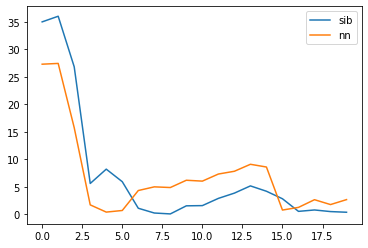

In [94]:
mean_sib = []
mean_nn = []
for i in range(1,21):
    mean_sib.append(np.array(temp_params["lambda_sib"][0:i]).mean())
    mean_nn.append(np.array(temp_params["lambda_nn"][0:i]).mean())
import matplotlib.pyplot as plt
plt.plot(100*abs(np.array(mean_sib)-args.lambda_)/args.lambda_, label="sib")
plt.plot(100*abs(np.array(mean_nn)-args.lambda_)/args.lambda_, label="nn")
plt.legend()

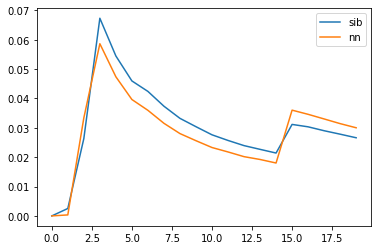

In [99]:
mean_sib = []
mean_nn = []
for i in range(1,21):
    mean_sib.append(np.array(temp_params["lambda_sib"][0:i]).std()/np.sqrt(i))
    mean_nn.append(np.array(temp_params["lambda_nn"][0:i]).std()/np.sqrt(i))
import matplotlib.pyplot as plt
plt.plot(abs(np.array(mean_sib)), label="sib")
plt.plot(abs(np.array(mean_nn)), label="nn")
plt.legend()

In [95]:
np.array(temp_params["lambda_nn"][0:21]).mean()

0.34062812104821205

<BarContainer object of 2 artists>

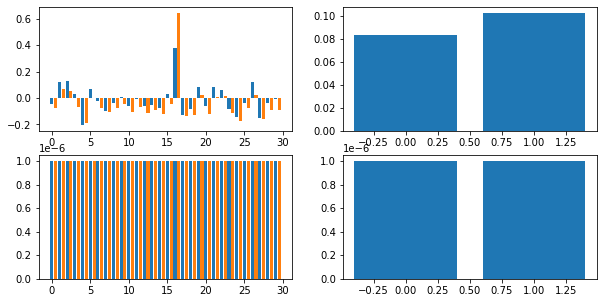

In [48]:
def err_param_rel(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (100.*(np.abs(np.array(temp_params[key]) - val_))/args.lambda_).mean()
    return a
def err_param(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (np.abs(np.array(temp_params[key]) - val_)).mean()
    return a

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10,5))
x=np.arange(len(temp_params['lambda_sib']))
axs[0][0].bar(x, np.array(temp_params['lambda_sib']) - args.lambda_, width=0.4)
axs[0][0].bar(x+0.5, np.array(temp_params['lambda_nn']) - args.lambda_, width=0.4)
axs[1][0].bar(x, np.array(temp_params['mu_sib']) - args.mu, width=0.4)
axs[1][0].bar(x+0.5, np.array(temp_params['mu_nn']) - args.mu, width=0.4)
err_sib_lam = err_param(temp_params, key='lambda_sib')
err_nn_lam = err_param(temp_params, key='lambda_nn')
err_sib_mu = err_param(temp_params, key='mu_sib', val_=args.mu)
err_nn_mu = err_param(temp_params, key='mu_nn', val_=args.mu)

axs[0][1].bar([0,1], [err_sib_lam, err_nn_lam], width=0.8)
axs[1][1].bar([0,1], [err_sib_mu, err_nn_mu], width=0.8)

No handles with labels found to put in legend.


[108.30902395  58.08014644  43.2769072 ]
[184.71030508  54.28680522  48.6478184 ]
[0.00028569 0.00028569 0.00028569]
[0.00028569 0.00028569 0.00028569]


<BarContainer object of 2 artists>

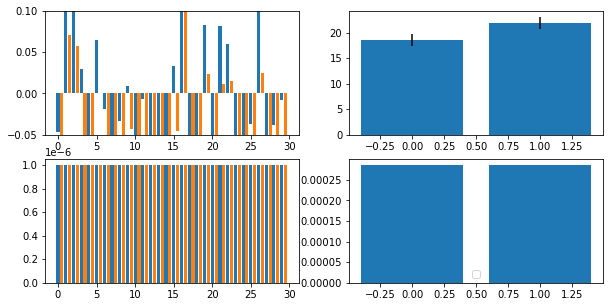

In [49]:
def err_param_rel(temp_params, key='lambda_sib', val_=args.lambda_, outliers=0.1):
    err = 100.*(np.abs(np.array(temp_params[key]) - val_))/args.lambda_
    num_outliers=int(len(err)*outliers)
    err[::-1].sort()
    a = err[num_outliers:].mean()
    a_err = err[num_outliers:].std()
    print(err[:num_outliers])
    return a, a_err
def err_param(temp_params, key='lambda_sib', val_=args.lambda_, outliers=0.1):
    err = np.abs(np.array(temp_params[key]) - val_)
    num_outliers=int(len(err)*outliers)
    err[::-1].sort()
    a = err[num_outliers:].mean()
    a_err = err[num_outliers:].std()
    print(err[:num_outliers])
    return a, a_err
N=args.N
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10,5))
x=np.arange(len(temp_params['lambda_sib']))
axs[0][0].bar(x, np.array(temp_params['lambda_sib']) - args.lambda_, width=0.4)
axs[0][0].bar(x+0.5, np.array(temp_params['lambda_nn']) - args.lambda_, width=0.4)
axs[1][0].bar(x, np.array(temp_params['mu_sib']) - args.mu, width=0.4)
axs[1][0].bar(x+0.5, np.array(temp_params['mu_nn']) - args.mu, width=0.4)
err_sib_lam, std_sib_lam = err_param_rel(temp_params, key='lambda_sib')
err_nn_lam, std_nn_lam = err_param_rel(temp_params, key='lambda_nn')
err_sib_mu, std_sib_mu = err_param_rel(temp_params, key='mu_sib', val_=args.mu)
err_nn_mu, std_nn_mu = err_param_rel(temp_params, key='mu_nn', val_=args.mu)
axs[0][0].set_ylim(-0.05,0.1)
plt.legend()
axs[0][1].bar([0,1], [err_sib_lam, err_nn_lam], width=0.8, yerr=[std_sib_lam/np.sqrt(N), std_nn_lam/np.sqrt(N)])
axs[1][1].bar([0,1], [err_sib_mu, err_nn_mu],yerr=[std_sib_mu/np.sqrt(N), std_nn_mu/np.sqrt(N)], width=0.8)

In [50]:
np.array(temp_params["lambda_nn"]).mean()

0.304070220887661

In [51]:
import pandas as pd
params_df = pd.DataFrame(temp_params)
params_df["mu"] = [args.mu]*len(params_df)
params_df["lambda"] = [args.lambda_]*len(params_df)
params_df.to_csv("res_params.gz")
params_df

,lambda_sib,lambda_nn,mu_sib,mu_nn,mu,lambda
0,0.303076,0.278115,9.999995e-07,1.000000e-06,1.000000e-10,0.35
1,0.472565,0.421417,9.999995e-07,1.000000e-06,1.000000e-10,0.35
2,0.479728,0.406982,9.999995e-07,1.000000e-06,1.000000e-10,0.35
3,0.379583,0.282181,9.999995e-07,1.000000e-06,1.000000e-10,0.35
4,0.146719,0.159996,9.999995e-07,1.000000e-06,1.000000e-10,0.35
5,0.415249,0.349936,9.999995e-07,1.000000e-06,1.000000e-10,0.35
6,0.330890,0.274092,9.999995e-07,1.000000e-06,1.000000e-10,0.35
7,0.252392,0.243050,9.999995e-07,1.000000e-06,1.000000e-10,0.35
8,0.316177,0.276782,9.999995e-07,1.000000e-06,1.000000e-10,0.35
9,0.359060,0.306511,9.999995e-07,1.000000e-06,1.000000e-10,0.35


<BarContainer object of 2 artists>

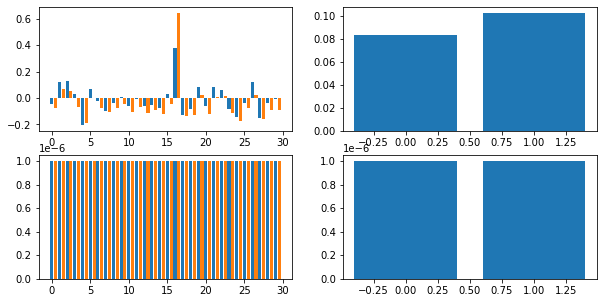

In [52]:
def err_param_rel(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (100.*(np.abs(np.array(temp_params[key]) - val_))/args.lambda_).mean()
    return a
def err_param(temp_params, key='lambda_sib', val_=args.lambda_):
    a = (np.abs(np.array(temp_params[key]) - val_)).mean()
    return a

import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2, figsize=(10,5))
x=np.arange(len(temp_params['lambda_sib']))
axs[0][0].bar(x, np.array(temp_params['lambda_sib']) - args.lambda_, width=0.4)
axs[0][0].bar(x+0.5, np.array(temp_params['lambda_nn']) - args.lambda_, width=0.4)
axs[1][0].bar(x, np.array(temp_params['mu_sib']) - args.mu, width=0.4)
axs[1][0].bar(x+0.5, np.array(temp_params['mu_nn']) - args.mu, width=0.4)
err_sib_lam = err_param(temp_params, key='lambda_sib')
err_nn_lam = err_param(temp_params, key='lambda_nn')
err_sib_mu = err_param(temp_params, key='mu_sib', val_=args.mu)
err_nn_mu = err_param(temp_params, key='mu_nn', val_=args.mu)

axs[0][1].bar([0,1], [err_sib_lam, err_nn_lam], width=0.8)
axs[1][1].bar([0,1], [err_sib_mu, err_nn_mu], width=0.8)

In [53]:
from utils.analysis import sort_I 

true_sources = {}
nn_sources = {}
sib_sources = {}
sm_sources = {}
rnd_sources_I = {}
rnd_sources = {}
Is={}
for cl in range(len(Ns)):
    true_sources[cl] = []
    nn_sources[cl] = []
    sib_sources[cl] = []
    rnd_sources[cl] = []
    rnd_sources_I[cl] = []
    sm_sources[cl] = []
    Is[cl] = []
    for i_seed, seed in enumerate(seeds):
        print(f"\nSEED: {seed}")

        for i in range(num_conf):
            true_sources[cl].append(np.argmin(data_[seed]["epidemy"][i][0][0]))
            nn_sources[cl].append(sort_I(ress[seed][Ns[cl]][i]["regressive"]["marginals"], 0))
            sib_sources[cl].append(sort_I(ress[seed][Ns[cl]][i]["sib"]["marginals"], 0))
            Is[cl].append((data_[seed]["epidemy"][i][0][0] != np.inf).sum())
            rnd_sources[cl].append(np.random.randint(0,Ns[cl]))
            rnd_sources_I[cl].append(np.random.randint(0,Is[cl][-1]))
            sm_sources[cl].append({})


SEED: 0

SEED: 1

SEED: 2

SEED: 3

SEED: 4

SEED: 5

SEED: 6

SEED: 7

SEED: 8

SEED: 9

SEED: 10

SEED: 11

SEED: 12

SEED: 13

SEED: 14

SEED: 15

SEED: 16

SEED: 17

SEED: 18

SEED: 19

SEED: 20

SEED: 21

SEED: 22

SEED: 23

SEED: 24

SEED: 25

SEED: 26

SEED: 27

SEED: 28

SEED: 29


In [54]:
avg_source_nn = {}
avg_source_sib = {}
avg_source_sm = {}
avg_source_rnd = {}
avg_source_rnd_I = {}
avg_source_nn_norm = {}
avg_source_sib_norm = {}
avg_source_sm_norm = {}
avg_source_rnd_norm = {}
enum=0
bins=20

for cl in range(len(Ns)):
    avg_source_nn[cl] = np.zeros(Ns[cl], dtype=float)
    avg_source_sib[cl] = np.zeros(Ns[cl], dtype=float)
    avg_source_rnd[cl] = np.zeros(Ns[cl], dtype=float)
    avg_source_rnd_I[cl] = np.zeros(Ns[cl], dtype=float)

    #print(nalpha)
    avg_source_sm[cl] = {}
    for n in range(Ns[cl]):
        for i in range(len(true_sources[cl])):
            avg_source_nn[cl][n] += true_sources[cl][i] in nn_sources[cl][i][:n+1,1]
            avg_source_sib[cl][n] += true_sources[cl][i] in sib_sources[cl][i][:n+1,1]
            avg_source_rnd[cl][n] += n+1 > rnd_sources[cl][i]
            avg_source_rnd_I[cl][n] += n+1 > rnd_sources_I[cl][i]
for cl in range(len(Ns)):
    avg_source_nn_norm[cl] = np.zeros(bins, dtype=float)
    avg_source_sib_norm[cl] = np.zeros(bins, dtype=float)
    avg_source_rnd_norm[cl] = np.zeros(bins, dtype=float)

    #print(nalpha)
    avg_source_sm_norm[cl] = {}
    for n in range(0, bins):
        for i in range(len(true_sources[cl])):
            I = Is[cl][i]
            step_I = I / bins
            pos_bins = int(step_I * n)
            pos_bins_1 = int(step_I * (n+1))
            if n == bins-1:
                pos_bins_1 = I

            avg_source_nn_norm[cl][n] += true_sources[cl][i] in nn_sources[cl][i][:pos_bins_1,1]
            avg_source_sib_norm[cl][n] += true_sources[cl][i] in sib_sources[cl][i][:pos_bins_1,1]
            avg_source_rnd_norm[cl][n] += pos_bins_1 > rnd_sources_I[cl][i]


In [55]:
cl = 0
avg_source_pd = pd.DataFrame(data={"nn":avg_source_nn[cl], "sib":avg_source_sib[cl], 
                                   "rnd":avg_source_rnd[cl], "rnd_I":avg_source_rnd_I[cl]})
for nsim in nsims:
    for alpha in range(nalpha): 
        avg_source_pd[f"sm_{nsim}_{args.a_min+alpha*args.a_step:.2f}"] = avg_source_sm[cl][nsim][alpha]

avg_source_pd_norm = pd.DataFrame(data={"nn":avg_source_nn_norm[cl], 
                                        "sib":avg_source_sib_norm[cl],
                                       "rnd":avg_source_rnd_norm[cl]})
for nsim in nsims:
    for alpha in range(nalpha): 
        avg_source_pd_norm[f"sm_{nsim}_{args.a_min+alpha*args.a_step:.2f}"] = avg_source_sm_norm[cl][nsim][alpha]

avg_source_pd

NameError: name 'nsims' is not defined

In [ ]:
avg_source_pd.to_csv("results.gz")
avg_source_pd_norm.to_csv("results_norm.gz")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
name="Greens"
colors = plt.get_cmap(name)

y_nn = np.insert(avg_source_nn[cl]/avg_source_nn[cl][-1],0,0)
y_sib = np.insert(avg_source_sib[cl]/avg_source_sib[cl][-1],0,0)
y_rnd = np.insert(avg_source_rnd[cl]/avg_source_rnd[cl][-1],0,0)
y_rnd_I = np.insert(avg_source_rnd_I[cl]/avg_source_rnd_I[cl][-1],0,0)
N = len(avg_source_nn[cl])
x = np.arange(N+1)/N
cl=0
plt.plot(x, y_rnd, "--", label=f"random -- auc: {auc(x, y_rnd):.3f}", color="black")
plt.plot(x, y_rnd_I, "--", label=f"random (only I) -- auc: {auc(x, y_rnd_I):.3f}", color="black")

for i, nsim in enumerate(nsims[1:]):
    alpha=21
    #for alpha in range(len(avg_source_sm[cl][nsim])):
    y_sm = np.insert(avg_source_sm[cl][nsim][alpha]/avg_source_sm[cl][nsim][alpha][-1],0,0)
    #print(alpha, avg_source_sm[cl][alpha])
    plt.plot(x, y_sm, ":",
             label=f"sm - {args.a_min+alpha*args.a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim:.0e}", 
             color=colors(np.clip(i/len(nsims[1:]), 0.3, 0.9)), lw=2)
plt.plot(x, y_sib, "-.", label=f"sib -- auc: {auc(x, y_sib):.3f}", linewidth="2")
plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}", linewidth="2")

plt.legend()
plt.xlim(0,1)
plt.ylim(0,1.01)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{len(true_sources[0])}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
y_nn = np.insert(avg_source_nn[cl]/avg_source_nn[cl][-1],0,0)
y_sib = np.insert(avg_source_sib[cl]/avg_source_sib[cl][-1],0,0)
N = len(avg_source_nn[cl])
x = np.insert(np.arange(N)/N,0,0)
cl=0
#plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}")
#plt.plot(x, y_sib, label=f"sib -- auc: {auc(x, y_sib):.3f}")

for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(avg_source_sm[cl][nsim])):
        y_sm = np.insert(avg_source_sm[cl][nsim][alpha]/avg_source_sm[cl][nsim][alpha][-1],0,0)
        #print(alpha, avg_source_sm[cl][alpha])
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
name="Greens"
colors = plt.get_cmap(name)

y_nn = np.insert(avg_source_nn_norm[cl]/avg_source_nn_norm[cl][-1],0,0)
y_sib = np.insert(avg_source_sib_norm[cl]/avg_source_sib_norm[cl][-1],0,0)
y_rnd = np.insert(avg_source_rnd_norm[cl]/avg_source_rnd_norm[cl][-1],0,0)
N = len(avg_source_nn_norm[cl])
x = np.arange(N+1)/N
cl=0
plt.plot(x, y_rnd, "--", label=f"random -- auc: {auc(x, y_rnd):.3f}", color="black")

for i, nsim in enumerate(nsims[1:]):
    alpha=21
    #for alpha in range(len(avg_source_sm[cl][nsim])):
    y_sm = np.insert(avg_source_sm_norm[cl][nsim][alpha]/avg_source_sm_norm[cl][nsim][alpha][-1],0,0)
    #print(alpha, avg_source_sm[cl][alpha])
    plt.plot(x, y_sm, ":",
             label=f"sm - {args.a_min+alpha*args.a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim:.0e}", 
             color=colors(np.clip(i/len(nsims[1:]), 0.3, 0.9)), lw=2)
plt.plot(x, y_sib, "-.", label=f"sib -- auc: {auc(x, y_sib):.3f}", linewidth="2")
plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}", linewidth="2")

plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.title(f"{args.type_graph} N:{Ns[0]}, days:{args.t_limit}, lambda_:{args.lambda_}, mu:{args.mu} inst:{len(true_sources[0])}")
plt.xlabel("fraction of infected or recovery nodes")
plt.ylabel("fraction of true sources found")
#plt.ylim(0,17)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
plt.figure(figsize=(10,5))
y_nn = np.insert(avg_source_nn_norm[cl]/avg_source_nn_norm[cl][-1],0,0)
y_sib = np.insert(avg_source_sib[cl]/avg_source_sib[cl][-1],0,0)
N = len(avg_source_nn_norm[cl])
x = np.arange(N+1)/N
cl=0
#plt.plot(x, y_nn, label=f"nn -- auc: {auc(x, y_nn):.3f}")
#plt.plot(x, y_sib, label=f"sib -- auc: {auc(x, y_sib):.3f}")

for nsim in nsims:
    alphas = []
    y = []
    for alpha in range(len(avg_source_sm_norm[cl][nsim])):
        y_sm = np.insert(avg_source_sm_norm[cl][nsim][alpha]/avg_source_sm_norm[cl][nsim][alpha][-1],0,0)
        #print(alpha, avg_source_sm[cl][alpha])
        #plt.plot(x, y_sm, label=f"sm - {a_min+alpha*a_step:.2f} -- auc {auc(x, y_sm):.3f} -- sims:{nsim}")
        y.append(auc(x, y_sm))
        alphas.append(args.a_min+alpha*args.a_step)
    plt.plot(alphas, y, label=f"nsim: {nsim:.0e}")
plt.legend()
#plt.xlim(0,1)
#plt.title(f"work95 N:{Ns[0]}, days:{t_limit}, gamma:{gamma[0]}, mu:{mu} inst:{len(true_sources[0])}")
#plt.ylim(0,17)